In [3]:
# 导入依赖函数库

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
# 数据集的目录位置

train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"

# 总分类数
num_classes = 10

In [8]:
# 构造图片数据生成器方法，包括数据增强

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,    # [0,255] => [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, #修剪
    zoom_range=0.2, #缩放
    horizontal_flip=True, #翻转
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [9]:
#构造图片数据生成器

train_generator = train_datagen.flow_from_directory(
    train_dir, #图片目录
    target_size=(224, 224), #转换图片大小
    batch_size=32, #训练中每个mini-batch大小
    class_mode="categorical" #分类问题，不同目录代表不同的分类
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [15]:
# 定义模型 -- 卷积神经网络

import tensorflow as tf  # tensorflow

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=[224,224,3]),   #卷积层1， 用5x5卷积核，relu激活函数, feature map: 6 input 224x224x3 output: 220x220x6
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 110x110x6
  tf.keras.layers.Conv2D(16, (5,5), activation='relu'), #卷积层2， 用5x5卷积核，relu激活函数, feature map: 16 input 110x110x6 output: 106x106x16
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 53x53x16
  tf.keras.layers.Conv2D(32, (5,5), activation='relu'),  #卷积层3， 用5x5卷积核，relu激活函数, feature map: 32 input 53x53x16 output: 49x49x32
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),  #池化2x2  output: 24x24x32
  tf.keras.layers.Conv2D(64, (5,5), activation='relu'),  #卷积层4， 用5x5卷积核，relu激活函数, feature map: 32 input 24x24x32 output: 20x20x32
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 10x10x32
  tf.keras.layers.Flatten(input_shape=[10,10,64]),
  tf.keras.layers.Dense(128, activation="relu"), #128的全连接网络
  tf.keras.layers.Dense(128, activation="relu"), #128的全连接网络
  tf.keras.layers.Dense(36, activation="softmax") #10分类概率分布
])

In [56]:
# 定义模型的损失函数， 优化算法（如何调整参数以降低损失），评价指标：准确率
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 49, 49, 32)        12832     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)      

In [57]:
# 训练过程： steps = 总图片数 / batch_size, epoch：训练轮次

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
97/97 [==============================] - 138s 1s/step - loss: 0.2961 - accuracy: 0.9030 - val_loss: 0.3058 - val_accuracy: 0.9563
Epoch 2/50
97/97 [==============================] - 136s 1s/step - loss: 0.3090 - accuracy: 0.8913 - val_loss: 0.3324 - val_accuracy: 0.9469
Epoch 3/50
97/97 [==============================] - 137s 1s/step - loss: 0.3099 - accuracy: 0.8884 - val_loss: 0.3337 - val_accuracy: 0.9438
Epoch 4/50
97/97 [==============================] - 137s 1s/step - loss: 0.2920 - accuracy: 0.8991 - val_loss: 0.3015 - val_accuracy: 0.9469
Epoch 5/50
97/97 [==============================] - 136s 1s/step - loss: 0.2974 - accuracy: 0.8965 - val_loss: 0.3271 - val_accuracy: 0.9438
Epoch 6/50
97/97 [==============================] - 137s 1s/step - loss: 0.3070 - accuracy: 0.8943 - val_loss: 0.2812 - val_accuracy: 0.9469
Epoch 7/50
97/97 [==============================] - 137s 1s/step - loss: 0.2948 - accuracy: 0.8943 - val_loss: 0.3331 - val_accuracy: 0.9469
Epoch 8/50
97

In [58]:
# 显示每轮的指标

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.296054,0.903017,0.305839,0.956250
1,0.308976,0.891340,0.332365,0.946875
2,0.309932,0.888420,0.333723,0.943750
3,0.291972,0.899124,0.301517,0.946875
4,0.297372,0.896529,0.327099,0.943750
5,0.307049,0.894259,0.281232,0.946875
6,0.294780,0.894259,0.333108,0.946875
7,0.309693,0.887447,0.334756,0.940625
8,0.297633,0.901719,0.260388,0.959375
9,0.322208,0.890042,0.327698,0.943750


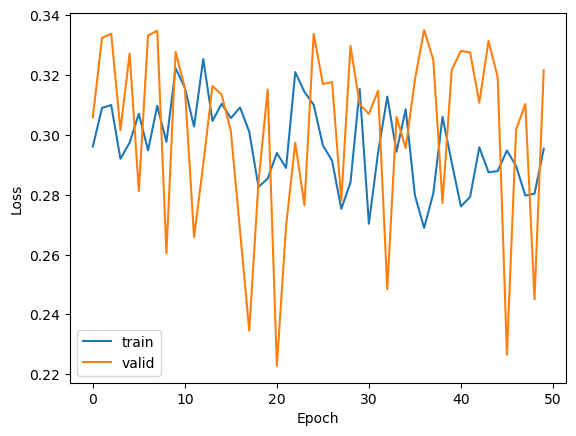

In [59]:
# 画出损失图，x轴：epoch, y轴：损失

import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

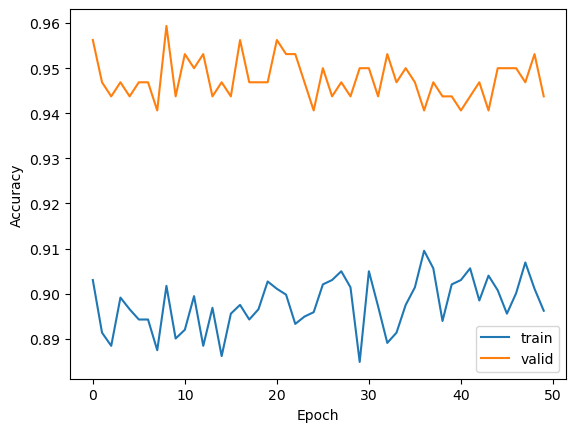

In [60]:
# 画出准确率曲线图，x轴：epoch, y轴：损失

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [61]:
# 用测试集进行预测，结果是10类每一类的概率值

preds = model.predict(test_generator)

12/12 [==============================] - 16s 1s/step


In [62]:
# 取概率最大的类别为分类结果

y_pred = np.argmax(preds, axis=1)

In [63]:
# 打印出类别表

pred_classes = {}
for k, v in test_generator.class_indices.items():
    print(v, ":", k)
    pred_classes[v] = k

pred_classes

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


{0: 'apple',
 1: 'banana',
 2: 'beetroot',
 3: 'bell pepper',
 4: 'cabbage',
 5: 'capsicum',
 6: 'carrot',
 7: 'cauliflower',
 8: 'chilli pepper',
 9: 'corn',
 10: 'cucumber',
 11: 'eggplant',
 12: 'garlic',
 13: 'ginger',
 14: 'grapes',
 15: 'jalepeno',
 16: 'kiwi',
 17: 'lemon',
 18: 'lettuce',
 19: 'mango',
 20: 'onion',
 21: 'orange',
 22: 'paprika',
 23: 'pear',
 24: 'peas',
 25: 'pineapple',
 26: 'pomegranate',
 27: 'potato',
 28: 'raddish',
 29: 'soy beans',
 30: 'spinach',
 31: 'sweetcorn',
 32: 'sweetpotato',
 33: 'tomato',
 34: 'turnip',
 35: 'watermelon'}

In [64]:
# 定义类别编号和名称转换字典

# pred_classes = {
#     0 : "apple",
#     1 : "banana",
#     2 : "grapes",
#     3 : "kiwi",
#     4 : "mango",
#     5 : "orange",
#     6 : "pear",
#     7 : "pineapple",
#     8 : "pomegranate",
#     9 : "watermelon"
# }

In [65]:
# 给出预测结果的类别 

y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [66]:
# 给出图片实际的类别 

y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [67]:
# 基于预测结果，和对应的分类标签，给出分类结果评估

from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        apple       0.70      1.00      0.82         7
       banana       0.78      1.00      0.88         7
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.69      0.78        13
      cabbage       1.00      1.00      1.00        10
     capsicum       0.70      0.78      0.74         9
       carrot       1.00      1.00      1.00        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.90      1.00      0.95         9
         corn       0.80      0.89      0.84         9
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.90      0.90      0.90        10
       ginger       0.90      0.90      0.90        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1.00        10
        l

In [68]:
# 存储模型

model.save("cnn.h5")